In [1]:
import random
import pickle

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


from extract_data import get_dataset

In [2]:
dataset = get_dataset()
x_data, y_data = dataset

/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
Either api or coformer not found. API= 1,2,4-thiadiazole derivative . Coformer= Vanillic acid
Either api or coformer not found. API= 4-cyanophenol . Coformer= 1,2-bis(4-dipyridyl)ethane
Either api or coformer not found. API= 4-cyanophenol . Coformer= trans-1,2-bis(4-dipyridyl)ethylene
Either api or coformer not found. API= bicalutamide . Coformer= trans-1,2-bis(4-dipyridyl)ethylene
Either api or coformer not found. API= Flurbiprofen . Coformer= 4,4'-ethylenebipyridine
Either api or coformer not found. API= Ibuprofen . Coformer= 4,4'-ethylenbipyridine
Either api or coformer not found. API= 3-cyanopyridin

In [3]:
n_components = 200
kernel='rbf'

In [25]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(x_data.iloc[:,:-2])

pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(scaled_data)

x_data_values = principal_components

y_data_values = y_data.iloc[:,:1]

np.random.seed(50)
shuffled_indices = random.sample(range(x_data_values.shape[0]),x_data_values.shape[0])
test_size = 0.2
train_cursor = int(np.floor((1-test_size)*(x_data_values.shape[0])))
train_indices = shuffled_indices[:train_cursor]
test_indices = shuffled_indices[train_cursor:]

x_train = pd.DataFrame(x_data_values[train_indices,:])
y_train = y_data_values.iloc[train_indices,:]

x_test = pd.DataFrame(x_data_values[test_indices,:])
y_test = y_data_values.iloc[test_indices,:]

In [26]:
svm_model = SVC(kernel=kernel)
svm_model.fit(x_train, y_train)

/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [27]:
y_pred_train = svm_model.predict(x_train)
y_pred_test = svm_model.predict(x_test)

In [28]:
accuracy_score(y_test, y_pred_test)

0.8205645161290323

In [29]:
accuracy_score(y_train, y_pred_train)

0.8646464646464647

In [31]:
svm_model = SVC(kernel=kernel)

# svm_model.fit(x_train, y_train) # To train the model
# with open('models/svm_model.pkl', 'wb') as f:
#     pickle.dump(svm_model, f)

with open('models/svm_model.pkl', 'rb') as f:
    svm_model = pickle.load(f)

y_pred = svm_model.predict(x_test)

accuracy_score(y_test, y_pred)

0.8205645161290323

In [32]:
accuracy_score(y_train, svm_model.predict(x_train))

0.8646464646464647

In [33]:
r = 10

print("Accuracy:", round(accuracy_score(y_test, y_pred),r))
print("Precision:", round(precision_score(y_test, y_pred),r))
print("Recall:", round(recall_score(y_test, y_pred),r))
print("F1-Score:", round(f1_score(y_test, y_pred),r))
print(classification_report(y_test, y_pred))

Accuracy: 0.8205645161
Precision: 0.8288973384
Recall: 0.8320610687
F1-Score: 0.8304761905
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       234
           1       0.83      0.83      0.83       262

    accuracy                           0.82       496
   macro avg       0.82      0.82      0.82       496
weighted avg       0.82      0.82      0.82       496



Confusion Matrix:
[[189  45]
 [ 44 218]]


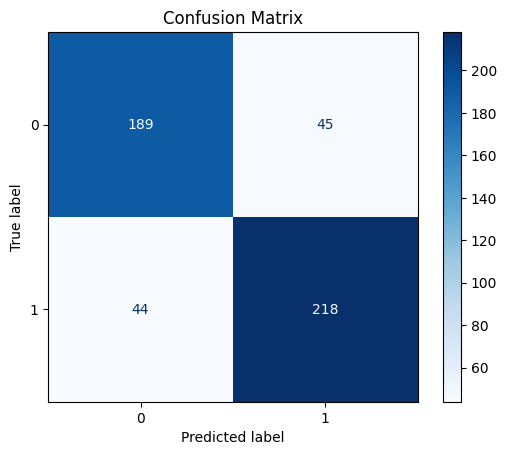

In [34]:
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()